In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer

import os
import matplotlib.pyplot as plot
import seaborn as sns
import pandas as pd
import cv2
import numpy as np

from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from random import randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [ ]:
def get_images():
    # read train, test images
    # make it imbalance
    # then merge, shuffle, split
    
    dir_train = '/content/drive/MyDrive/Mine/hw-cnn-naturalscene-classification/data/seg_train'
    dir_test = '/content/drive/MyDrive/Mine/hw-cnn-naturalscene-classification/data/seg_test'
    
    label_str_to_int = {
        'buildings': 0,
        'forest': 1,
        'glacier': 2,
        'mountain': 3,
        'sea': 4,
        'street': 5,
    }
    
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    
    # read train images
    for label_str in os.listdir(dir_train):
        label_int = label_str_to_int[label_str]
        image_dir = os.path.join(dir_train, label_str)
        
        for image_file in os.listdir(image_dir):
            image = cv2.imread(os.path.join(image_dir, image_file)) # Read image.
            image = cv2.resize(image, (150, 150)) # Resize images. Some images are different sizes.
            train_images.append(image)
            train_labels.append(label_int)
        
    # read test images
    for label_str in os.listdir(dir_test):
        label_int = label_str_to_int[label_str]
        image_dir = os.path.join(dir_test, label_str)
        
        for image_file in os.listdir(image_dir):
            image = cv2.imread(os.path.join(image_dir, image_file)) # Read image.
            image = cv2.resize(image, (150, 150)) # Resize images. Some images are different sizes.
            test_images.append(image)
            test_labels.append(label_int)
                          
                
    x_train, y_train = shuffle(train_images, train_labels)
    x_test, y_test = shuffle(test_images, test_labels)
    
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
x_train, y_train, x_test, y_test = get_images()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10793, 150, 150, 3) (10793,)
(3604, 150, 150, 3) (3604,)


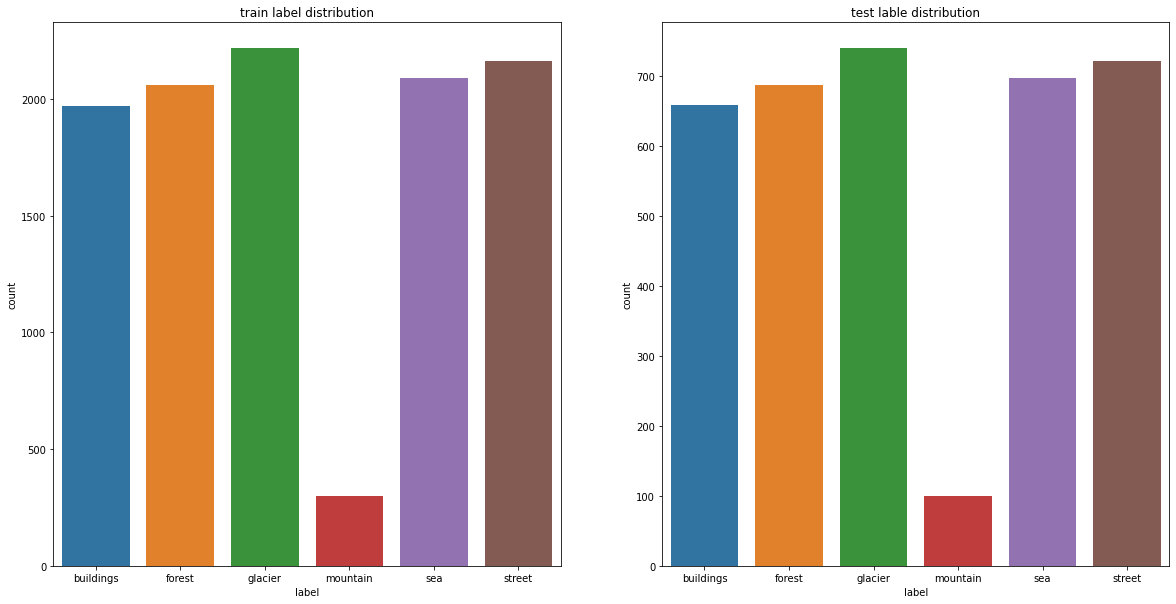

In [ ]:
# label distribution
train_label_str = [get_classlabel(label_int) for label_int in y_train.tolist()]
test_label_str = [get_classlabel(label_int) for label_int in y_test.tolist()]
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

df_train_label = pd.DataFrame(train_label_str, columns=['label'])
df_test_label = pd.DataFrame(test_label_str, columns=['label'])
f, ax = plot.subplots(1, 2, figsize=(20, 10))
sns.countplot(x='label', data=df_train_label, ax=ax[0], order=labels)
ax[0].set_title('train label distribution')
sns.countplot(x='label', data=df_test_label, ax=ax[1], order=labels)
ax[1].set_title('test lable distribution')
plot.show()


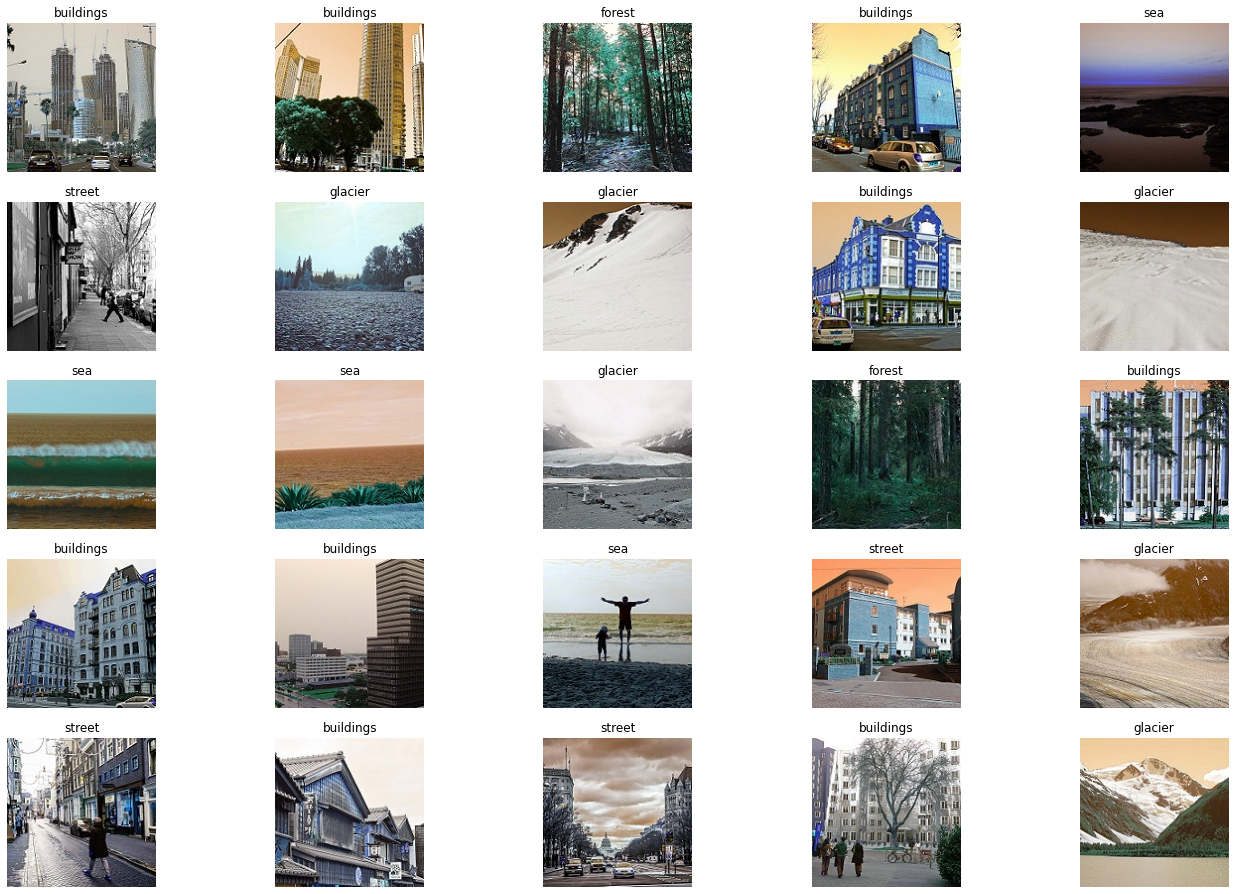

In [ ]:
# some images
f, ax = plot.subplots(5, 5) 
f.subplots_adjust(0, 0, 3, 3)
for i in range(0, 5, 1):
    for j in range(0, 5, 1):
        rnd_number = randint(0, x_train.shape[0])
        ax[i, j].imshow(x_train[rnd_number])
        ax[i, j].set_title(get_classlabel(y_train[rnd_number]))
        ax[i, j].axis('off')

In [ ]:
## create CNN model
model = Models.Sequential()
# layers here

#Set hyper-parameter
model.compile()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

In [ ]:
# train
trained = model.fit(x_train , y_train , epochs=20, validation_split=0.30, verbose=1)

Epoch 1/20
237/237 [==============================] - 37s 156ms/step - loss: 1.4875 - accuracy: 0.4251 - val_loss: 1.1311 - val_accuracy: 0.5676
Epoch 2/20
237/237 [==============================] - 37s 154ms/step - loss: 1.1109 - accuracy: 0.5718 - val_loss: 0.8469 - val_accuracy: 0.6927
Epoch 3/20
237/237 [==============================] - 37s 155ms/step - loss: 0.9803 - accuracy: 0.6432 - val_loss: 0.7704 - val_accuracy: 0.7233
Epoch 4/20
237/237 [==============================] - 37s 154ms/step - loss: 0.8515 - accuracy: 0.6954 - val_loss: 0.7330 - val_accuracy: 0.7384
Epoch 5/20
237/237 [==============================] - 37s 155ms/step - loss: 0.7816 - accuracy: 0.7320 - val_loss: 0.6592 - val_accuracy: 0.7718
Epoch 6/20
237/237 [==============================] - 37s 155ms/step - loss: 0.6951 - accuracy: 0.7673 - val_loss: 0.6161 - val_accuracy: 0.7826
Epoch 7/20
237/237 [==============================] - 37s 155ms/step - loss: 0.6352 - accuracy: 0.7906 - val_loss: 0.5657 - val_ac

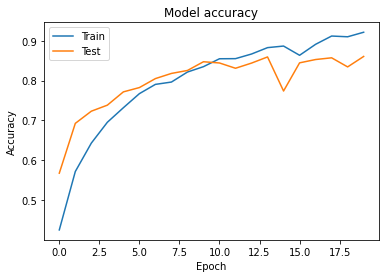

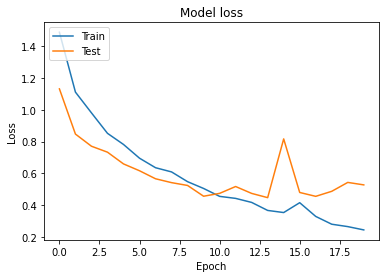

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
# evaluate on test set
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('loss:', loss)
print('acc:', acc)

113/113 - 5s - loss: 0.5307 - accuracy: 0.8541
loss: 0.5306860208511353
acc: 0.8540510535240173


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
# precision and recall on small-sized label are low
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       658
           1       0.95      0.97      0.96       687
           2       0.79      0.91      0.85       740
           3       0.59      0.19      0.29       100
           4       0.84      0.87      0.85       697
           5       0.86      0.84      0.85       722

    accuracy                           0.85      3604
   macro avg       0.81      0.76      0.77      3604
weighted avg       0.85      0.85      0.85      3604

